In [1]:
import pandas as pd
import numpy as np

from joblib import dump, load

import sys
sys.path.append('../../library')
from missing_values_utils import impute_quant_by_cat, replace_missing_cat_keep_prop, impute_missing_cat_by_target
from aggr_utils import aggr_loca

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



In [2]:
df = load(r'..\..\..\temp_data\1.2-leibold-data-preprocessing_concat.joblib')
#df = df.sample(n=70000)

print(df.shape)
display(df.head(3))


(762666, 44)


,acc_num,ind_place,ind_cat,ind_severity,ind_sex,ind_trip,ind_secu1,ind_secu2,ind_location,ind_action,...,veh_id,loca_road_cat,loca_traffic_circul,loca_road_lanes,loca_road_gradient,loca_road_view,loca_road_surface_cond,loca_accident,loca_max_speed,loca_is_intersection
0,201900000001,2,2,2,2,0,1,0,<NA>,<NA>,...,138 306 524,1,3,10.00,1,2.00,1.00,1,70.00,0
1,201900000001,1,1,2,2,5,1,0,<NA>,<NA>,...,138 306 524,1,3,10.00,1,2.00,1.00,1,70.00,0
2,201900000001,1,1,1,1,0,1,0,<NA>,<NA>,...,138 306 525,1,3,10.00,1,2.00,1.00,1,70.00,0


In [3]:
df.drop('veh_id', axis=1, inplace=True)
df.drop('ind_year', axis=1, inplace=True)
df.drop('acc_date', axis=1, inplace=True)
df.drop('ind_age', axis=1, inplace=True)
df.drop('acc_metro', axis=1, inplace=True)
df.drop('acc_long', axis=1, inplace=True)
df.drop('acc_lat', axis=1, inplace=True)

df.drop('ind_secu2', axis=1, inplace=True)
df.drop('ind_location', axis=1, inplace=True)
df.drop('ind_action', axis=1, inplace=True)
df.drop('acc_department', axis=1, inplace=True)


In [4]:
# -------------------------------------------------------------------------------------------------
# distinguish categorcial / quantitative variables
# -------------------------------------------------------------------------------------------------
cols_cat = ['acc_year','acc_municipality','acc_ambient_lightning','acc_urbanization_level','acc_intersection','acc_atmosphere','acc_collision_type',
            'ind_place','ind_cat','ind_sex','ind_trip','ind_location','ind_action','ind_secu1','ind_secu2','ind_age_group', 
            'loca_road_cat','loca_traffic_circul','loca_road_gradient','loca_road_view','loca_road_surface_cond','loca_accident', 'loca_is_intersection',
            'veh_cat','veh_fixed_obstacle','veh_moving_obstacle','veh_impact','veh_maneuver','veh_motor' 
           ]

cols_ordinal = ['acc_year',
                'ind_age_group',
                'loca_road_cat','loca_road_surface_cond'
               ]

cols_nominal = ['acc_department', 'acc_municipality', 'acc_ambient_lightning','acc_urbanization_level','acc_intersection','acc_atmosphere','acc_collision_type',
                'ind_place','ind_cat', 'ind_sex','ind_trip','ind_location','ind_action','ind_secu1','ind_secu2',
                'loca_traffic_circul', 'loca_road_gradient','loca_road_view','loca_accident', 'loca_is_intersection',
                'veh_cat', 'veh_fixed_obstacle','veh_moving_obstacle','veh_impact','veh_maneuver','veh_motor'                
               ]

cols_quant = ['loca_road_lanes','loca_max_speed','loca_road_count']

cols_cyclic = ['acc_month','acc_hour']
#cols_irrelevant = ['acc_department','ind_vehID','veh_id']

In [5]:
# -------------------------------------------------------------------------------------------------
# check if missing values exist
# -------------------------------------------------------------------------------------------------
missing_vars = df.isna().sum()
missing_vars = missing_vars[missing_vars > 0]

print(missing_vars)

ind_secu1                  1074
acc_ambient_lightning        10
acc_atmosphere               37
acc_intersection             29
acc_collision_type         3769
veh_impact                  303
veh_maneuver              43006
loca_road_lanes           22320
loca_road_view              473
loca_road_surface_cond      626
loca_max_speed            23608
dtype: int64


In [6]:
# -------------------------------------------------------------------------------------------------
# replace missing values 
# -------------------------------------------------------------------------------------------------
# quantitative variables: replace by distirbutiion of loca_road_cat, the rest randomly keeping the overall proportion
df = impute_quant_by_cat(df, quant_var="loca_road_lanes", cat_var="loca_road_cat")
df = impute_quant_by_cat(df, quant_var="loca_max_speed", cat_var="loca_road_cat")

# replace missing values for categorical variables: replace randomly but keep proportion
df = impute_missing_cat_by_target(df, var_list=cols_cat, target='ind_severity')


# # replace missing values for categorical variables: replace randomly but keep proportion
# df = replace_missing_cat_keep_prop(df, cols_cat)

#print(df['loca_road_lanes'].value_counts(normalize=True))

🔍 Found 22320 missing values in 'loca_road_lanes'. Imputing...
✅ Finished imputing 'loca_road_lanes'.
🔍 Found 23608 missing values in 'loca_max_speed'. Imputing...
✅ Finished imputing 'loca_max_speed'.
✅ No missing values in 'acc_year'. Skipping.

✅ No missing values in 'acc_municipality'. Skipping.

🔄 Replaced 10 missing values in 'acc_ambient_lightning'.
⏱️ Computational time: 0.1116 seconds

✅ No missing values in 'acc_urbanization_level'. Skipping.

🔄 Replaced 29 missing values in 'acc_intersection'.
⏱️ Computational time: 0.3692 seconds

🔄 Replaced 37 missing values in 'acc_atmosphere'.
⏱️ Computational time: 0.6552 seconds

🔄 Replaced 3769 missing values in 'acc_collision_type'.
⏱️ Computational time: 29.0119 seconds

✅ No missing values in 'ind_place'. Skipping.

✅ No missing values in 'ind_cat'. Skipping.

✅ No missing values in 'ind_sex'. Skipping.

✅ No missing values in 'ind_trip'. Skipping.

⚠️ Column 'ind_location' not found in DataFrame. Skipping.
⚠️ Column 'ind_action' n

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762666 entries, 0 to 807331
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   acc_num                 762666 non-null  int64  
 1   ind_place               762666 non-null  int64  
 2   ind_cat                 762666 non-null  int64  
 3   ind_severity            762666 non-null  int64  
 4   ind_sex                 762666 non-null  int64  
 5   ind_trip                762666 non-null  int64  
 6   ind_secu1               762666 non-null  Int64  
 7   ind_age_group           762666 non-null  Int64  
 8   ind_temp_id             762666 non-null  object 
 9   acc_year                762666 non-null  int64  
 10  acc_month               762666 non-null  int64  
 11  acc_hour                762666 non-null  int64  
 12  acc_municipality        762666 non-null  object 
 13  acc_ambient_lightning   762666 non-null  float64
 14  acc_atmosphere          7

In [8]:
# -------------------------------------------------------------------------------------------------
# aggregate loca data
# -------------------------------------------------------------------------------------------------
df_aggr = aggr_loca(df)
df_aggr.drop('ind_temp_id', axis=1, inplace=True)

display(df_aggr.head())
df_aggr.info()

,acc_num,ind_place,ind_cat,ind_severity,ind_sex,ind_trip,ind_secu1,ind_age_group,acc_year,acc_month,...,loca_road_surface_cond_9.0,loca_accident_0,loca_accident_1,loca_accident_2,loca_accident_3,loca_accident_4,loca_accident_5,loca_accident_6,loca_accident_7,loca_road_count
0,201900000001,2,2,2,2,0,1,1,2019,11,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1
1,201900000001,1,1,2,2,5,1,3,2019,11,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1
2,201900000001,1,1,1,1,0,1,4,2019,11,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1
3,201900000002,1,1,2,2,0,1,3,2019,11,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1
4,201900000003,1,1,1,1,0,1,2,2019,11,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692159 entries, 0 to 692158
Data columns (total 66 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   acc_num                     692159 non-null  int64  
 1   ind_place                   692159 non-null  int64  
 2   ind_cat                     692159 non-null  int64  
 3   ind_severity                692159 non-null  int64  
 4   ind_sex                     692159 non-null  int64  
 5   ind_trip                    692159 non-null  int64  
 6   ind_secu1                   692159 non-null  Int64  
 7   ind_age_group               692159 non-null  Int64  
 8   acc_year                    692159 non-null  int64  
 9   acc_month                   692159 non-null  int64  
 10  acc_hour                    692159 non-null  int64  
 11  acc_municipality            692159 non-null  object 
 12  acc_ambient_lightning       692159 non-null  float64
 13  acc_atmosphere

<Axes: xlabel='loca_road_lanes', ylabel='Density'>

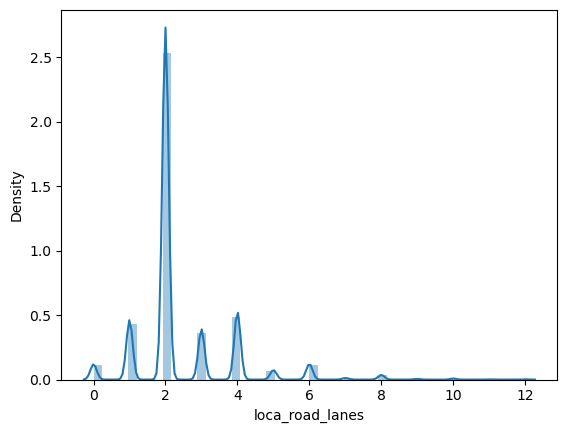

In [17]:
# # -------------------------------------------------------------------------------------------------
# # check distribution of quant vars to decide which scaler suits best -> MinMax
# # -------------------------------------------------------------------------------------------------
# import seaborn as sns
# df_check = load(r'..\..\..\temp_data\1.2-leibold-data-preprocessing_concat.joblib')
# sns.distplot(df_check['loca_road_lanes'], kde=True)


In [9]:
# -------------------------------------------------------------------------------------------------
# scale quantitative variables
# -------------------------------------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Initialize scalers
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

# Apply MinMaxScaler to loca_max_speed
df_aggr['loca_max_speed'] = minmax_scaler.fit_transform(df_aggr[['loca_max_speed']])

# Apply RobustScaler to loca_road_lanes
df_aggr['loca_road_lanes'] = robust_scaler.fit_transform(df_aggr[['loca_road_lanes']])

# Quick check
print(df_aggr[['loca_max_speed']].head())
print(df_aggr[['loca_road_lanes']].head())

   loca_max_speed
0            0.39
1            0.39
2            0.39
3            0.39
4            0.50
   loca_road_lanes
0             8.00
1             8.00
2             8.00
3             0.00
4             6.00


In [10]:
# print(df_aggr.nunique().sort_values(ascending=False))
#df_aggr.drop(['acc_num','acc_municipality','acc_department'], axis=1, inplace=True)
df_aggr.drop(['acc_num'], axis=1, inplace=True)

In [11]:
# --------------------------------------------------------------------------------------------------------------------------------
# regroup classes of categorical variables with high cardinality
# --------------------------------------------------------------------------------------------------------------------------------
# veh_cat
df_aggr['veh_cat'] = df_aggr['veh_cat'].replace(10, 7)  # 7-Light vehicle only, 10-Light vehicle only1.5T<= GVWR<= 3.5T => 7-Light Vehicle
df_aggr['veh_cat'] = df_aggr['veh_cat'].replace(80, 1)  # 1-Bicycle, 80-E-bike => 1-Bicycle/E-Bike
df_aggr['veh_cat'] = df_aggr['veh_cat'].replace([2,31], 33)  # 2-Moped<50cc, 31-Motorcycle>50ccand<=125cc, 33-Motorcycle>125cc => 33-Motorcycle/Moped
df_aggr['veh_cat'] = df_aggr['veh_cat'].replace([13,15], 14)  # 13-HGVonly3.5T<GVW<=7.5T, 14-HGVonly>7.5T, 15-HGV>3.5T+trailer => 14-Heavy goods vehicle
df_aggr['veh_cat'] = df_aggr['veh_cat'].replace([38,39,40], 37) # 37-Bus, 38-Coach, 39-Train, 40-Tram => 37-Public Transport
df_aggr['veh_cat'] = df_aggr['veh_cat'].replace([16,20,21], 17) # 16-Road tractor only , 20-Special engine vehicle , 21-Agricultural tractor => 17-Tractor
df_aggr['veh_cat'] = df_aggr['veh_cat'].replace(3, 99) # 3-Small car (quadricycle with bodied motor) (formerly "small car or motor tricycle")  => 99-Other Vehicle
df_aggr['veh_cat'] = df_aggr['veh_cat'].replace(60, 50) # 50-EDP with engine, 60-EDP without engine => 50-EDP
df_aggr['veh_cat'] = df_aggr['veh_cat'].replace([32,34,35,36,41,42,43], 30)  # 30-Scooter<50cc, 32-Scooter>50ccand<=125cc, 34-Scooter>125cc, 35-Lightquad<=50cc, 36-Heavyquad>50cc 
                                                                                               # 41-3WD<=50cc ,42-3WD>50cc<=125cc ,43-3WD>125cc50EDPwithengine  => 30-Scooter/3WD/Quad 

# veh_fixed_obstacle
df_aggr['veh_fixed_obstacle'] = df_aggr['veh_fixed_obstacle'].replace(3, 4) # 3-Metal barrier , 4-Concrete barrier , => 4 - Concrete / Metal Barrier
df_aggr['veh_fixed_obstacle'] = df_aggr['veh_fixed_obstacle'].replace([7,9,10,11,12,14,15,16], 5) # low frequencies => 5-Other barrier

# veh_moving_obstacle
df_aggr['veh_moving_obstacle'] = df_aggr['veh_moving_obstacle'].replace([4,5,6], 9) # low frequencies => 9-Other

# veh_maneuver
df_aggr['veh_maneuver'] = df_aggr['veh_maneuver'].replace(12, 11) # 11-Changing lanes Left, 12-Changing lanes Right, => 11 - Changing lanes left/right 
df_aggr['veh_maneuver'] = df_aggr['veh_maneuver'].replace(14, 13) # 13-Offset Left, 14- Offset Right => 13 - Offset left/right
df_aggr['veh_maneuver'] = df_aggr['veh_maneuver'].replace(16, 15) # 15-Turning Left , 16-Turning Right , => 15 - Turning left/right
df_aggr['veh_maneuver'] = df_aggr['veh_maneuver'].replace(18, 17) # 17-Overtaking Left , 18-Overtaking Right  => 17 - Overtaking left/right
df_aggr['veh_maneuver'] = df_aggr['veh_maneuver'].replace([4,10,20,22,24], 98) # other low frequency variables with low mean on target => 98 - Others less severe
df_aggr['veh_maneuver'] = df_aggr['veh_maneuver'].replace([3,6,7,8,21,25], 99) # other low frequency variables with low mean on target => 99 - Others highly severe

In [12]:
# -------------------------------------------------------------------------------------------------
# one hot encoder: all other categorical variables except loca variables
# -------------------------------------------------------------------------------------------------
from sklearn.preprocessing import OneHotEncoder


cols_cat = ['acc_year','acc_ambient_lightning','acc_urbanization_level','acc_intersection','acc_atmosphere','acc_collision_type',
            'ind_place','ind_cat','ind_trip','ind_secu1', 'ind_age_group', 
            'veh_cat','veh_fixed_obstacle','veh_moving_obstacle','veh_impact','veh_maneuver','veh_motor' 
           ]
# 'ind_location','ind_action','ind_secu2',

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit and transform
encoded_array = encoder.fit_transform(df_aggr[cols_cat])

# Convert back to DataFrame with proper column names
encoded_df = pd.DataFrame(encoded_array, 
                          columns=encoder.get_feature_names_out(cols_cat),
                          index=df_aggr.index)

# Concatenate with the rest of df_aggr
df_aggr_encoded = pd.concat([df_aggr.drop(columns=cols_cat), encoded_df], axis=1)

# Quick check
print("Original shape:", df_aggr.shape)
print("Encoded shape:", df_aggr_encoded.shape)


Original shape: (692159, 65)
Encoded shape: (692159, 155)


In [13]:
# -------------------------------------------------------------------------------------------------
# Trigonumeric encoder: acc_month and acc_hour with 
# -------------------------------------------------------------------------------------------------
import numpy as np

# Encode acc_month (1–12)
df_aggr_encoded['acc_month_sin'] = np.sin(2 * np.pi * df_aggr_encoded['acc_month'] / 12)
df_aggr_encoded['acc_month_cos'] = np.cos(2 * np.pi * df_aggr_encoded['acc_month'] / 12)

# Encode acc_hour (0–23)
df_aggr_encoded['acc_hour_sin'] = np.sin(2 * np.pi * df_aggr_encoded['acc_hour'] / 24)
df_aggr_encoded['acc_hour_cos'] = np.cos(2 * np.pi * df_aggr_encoded['acc_hour'] / 24)

df_aggr_encoded.drop(['acc_month','acc_hour'], axis=1, inplace=True)

In [14]:
# -------------------------------------------------------------------------------------------------
# TargetEncoder: acc_municipality
# -------------------------------------------------------------------------------------------------
from category_encoders import TargetEncoder

# Define target
y = df_aggr_encoded["ind_severity"]

encoder = TargetEncoder(cols=['acc_municipality'])

df_aggr_encoded = df_aggr_encoded.copy()
df_aggr_encoded["acc_municipality"] = encoder.fit_transform(df_aggr[["acc_municipality"]], y)



In [15]:
# Print all columns (too many features for df.info())
for i, col in enumerate(df_aggr_encoded.columns):
    print(i, col)


0 ind_severity
1 ind_sex
2 acc_municipality
3 loca_road_lanes
4 loca_max_speed
5 loca_is_intersection
6 loca_road_cat_1
7 loca_road_cat_2
8 loca_road_cat_3
9 loca_road_cat_4
10 loca_road_cat_5
11 loca_road_cat_6
12 loca_road_cat_7
13 loca_road_cat_8
14 loca_traffic_circul_0
15 loca_traffic_circul_1
16 loca_traffic_circul_2
17 loca_traffic_circul_3
18 loca_traffic_circul_4
19 loca_road_gradient_0
20 loca_road_gradient_1
21 loca_road_gradient_2
22 loca_road_gradient_3
23 loca_road_gradient_4
24 loca_road_view_1.0
25 loca_road_view_2.0
26 loca_road_view_3.0
27 loca_road_view_4.0
28 loca_road_surface_cond_1.0
29 loca_road_surface_cond_2.0
30 loca_road_surface_cond_3.0
31 loca_road_surface_cond_4.0
32 loca_road_surface_cond_5.0
33 loca_road_surface_cond_6.0
34 loca_road_surface_cond_7.0
35 loca_road_surface_cond_8.0
36 loca_road_surface_cond_9.0
37 loca_accident_0
38 loca_accident_1
39 loca_accident_2
40 loca_accident_3
41 loca_accident_4
42 loca_accident_5
43 loca_accident_6
44 loca_accide

In [16]:
# check target encoded acc_municipality
df_aggr_encoded['acc_municipality'].head(10)

0   1.60
1   1.60
2   1.60
3   1.59
4   1.59
5   1.59
6   1.59
7   1.59
8   1.55
9   1.55
Name: acc_municipality, dtype: float64

In [ ]:
#
#
#
# -------------------------------------------------------------------------------------------------
# LazyPredict modelling
# -------------------------------------------------------------------------------------------------
#
#
#

In [17]:
# Separate features and target
X = df_aggr_encoded.drop(columns=['ind_severity'])   # predictors
y = df_aggr_encoded['ind_severity']                  # target

In [18]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [26]:
# -------------------------------------------------------------------------------------------------
# manual LazyPredict without models with high computational costs
# -------------------------------------------------------------------------------------------------
import time
import sys

from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
from sklearn.utils import all_estimators


# Exclude these models
exclude = {"SVC", "LinearSVC", "LabelSpreading", "CalibratedClassifierCV", "LabelPropagation"}

# Get all classifiers except excluded ones
estimators = [(name, cls) for name, cls in all_estimators(type_filter="classifier") if name not in exclude]

results = []

for name, Classifier in estimators:
    try:
        print(f"Fitting {name}...", flush=True)  # show current model
        start = time.time()

        model = Classifier()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        end = time.time()
        elapsed = end - start

        results.append({
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
            "F1 Score": f1_score(y_test, y_pred, average="weighted"),
            "Time Taken (s)": elapsed
        })
    except Exception as e:
        print(f"{name} failed: {e}", flush=True)

# Convert results to DataFrame like LazyPredict
df = pd.DataFrame(results).set_index("Model").sort_values(by="Accuracy", ascending=False)
print(df)

Fitting AdaBoostClassifier...
Fitting BaggingClassifier...
Fitting BernoulliNB...
Fitting CategoricalNB...
CategoricalNB failed: Negative values in data passed to CategoricalNB (input X).
Fitting ClassifierChain...
ClassifierChain failed: tuple index out of range
Fitting ComplementNB...
ComplementNB failed: Negative values in data passed to ComplementNB (input X).
Fitting DecisionTreeClassifier...
Fitting DummyClassifier...
Fitting ExtraTreeClassifier...
Fitting ExtraTreesClassifier...
Fitting FixedThresholdClassifier...
FixedThresholdClassifier failed: FixedThresholdClassifier.__init__() missing 1 required positional argument: 'estimator'
Fitting GaussianNB...
Fitting GaussianProcessClassifier...
GaussianProcessClassifier failed: Unable to allocate 2.23 TiB for an array with shape (553727, 553727) and data type float64
Fitting GradientBoostingClassifier...
Fitting HistGradientBoostingClassifier...
Fitting KNeighborsClassifier...
Fitting LinearDiscriminantAnalysis...
Fitting LogisticRe

In [25]:
# -------------------------------------------------------------------------------------------------
# LazyPredict including all models (get stuck after 81% because of too high computation time)
# -------------------------------------------------------------------------------------------------
from lazypredict.Supervised import LazyClassifier

# Initialize LazyPredict classifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate
models, predictions = clf.fit(X_train, X_test, y_train, y_test)


TypeError: LazyClassifier.fit() got an unexpected keyword argument 'classifiers'

In [18]:
# Show results from 70k rows sample
print(models)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.58               0.53    None      0.58   
LinearDiscriminantAnalysis         0.68               0.53    None      0.67   
BernoulliNB                        0.63               0.51    None      0.62   
LGBMClassifier                     0.70               0.50    None      0.68   
LogisticRegression                 0.69               0.50    None      0.68   
ExtraTreesClassifier               0.69               0.48    None      0.67   
RandomForestClassifier             0.69               0.48    None      0.67   
SVC                                0.69               0.48    None      0.67   
CalibratedClassifierCV             0.68               0.48    None      0.66   
BaggingClassifier                  0.66               0.47    None      0.64   
LinearSVC                          0.68 